# Marketing Analytics 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df2 = pd.read_csv('Data\marketing_EDA.csv')
df2.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp2,Response,Complain,Country,Age,Dependent,Monetary,Frequency,Generation,Segment
0,0,1826,1970,Graduation,Divorced,84835.0,2449,0,189,104,...,0,1,0,SP,51,0,1190,15,Gen X,Loyal
1,1,1,1961,Graduation,Single,57091.0,2450,0,464,5,...,1,1,0,CA,60,0,577,18,Boomers,Loyal
2,2,10476,1958,Graduation,Married,67267.0,2483,0,134,11,...,0,0,0,US,63,1,251,11,Boomers,Need Attention
3,3,1386,1967,Graduation,Together,32474.0,2485,0,10,0,...,0,0,0,AUS,54,2,11,4,Gen X,Need Attention
4,4,5371,1989,Graduation,Single,21474.0,2518,0,6,16,...,0,1,0,SP,32,1,91,8,Milenial,Need Attention


In [3]:
df2.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age', 'Dependent',
       'Monetary', 'Frequency', 'Generation', 'Segment'],
      dtype='object')

In [4]:
df2.drop('Unnamed: 0', axis = 1, inplace = True)

Since the data was already cleaned through previous script (clustering purpose), so it will go to Visualization directly.

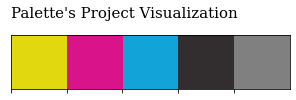

In [5]:
#setting palette for vizualization

pal_list = ['#e2d810', '#d9138a', '#12a4d9', '#322e2f', 'gray']
sns.palplot(pal_list)
plt.title("Palette's Project Visualization", loc = 'left', fontfamily = 'serif', fontsize = 15, y = 1.2)
plt.show()

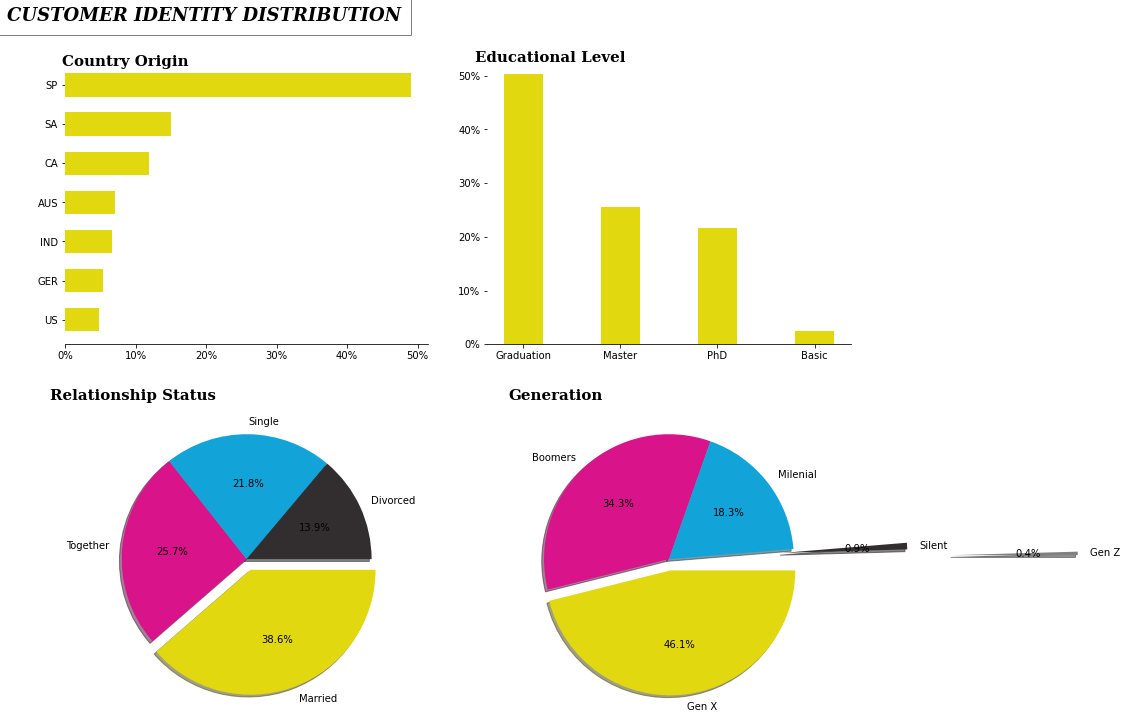

In [6]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(2, 2, figsize = (15, 10))
fig.patch.set_facecolor('white')

ax0 = ax[0, 0]
ax1 = ax[0, 1]
ax2 = ax[1, 0]
ax3 = ax[1, 1]

for s in ['top', 'right', 'left']:
    for i in range(0, 4):
        locals()[f'ax{i}'].spines[s].set_visible(False)
        locals()[f'ax{i}'].set_facecolor('white')
        
#Country
    #data
country_data = pd.DataFrame(df2['Country'].value_counts())[:7]
country_data['percentage'] = country_data['Country'].apply(lambda x: x / sum(country_data['Country']) * 100)
    #viz
x_country = np.arange(len(country_data.index))
ax0.barh(country_data.index, width = country_data['percentage'], zorder = 3, color = '#e2d810', height = 0.6)
ax0.xaxis.set_major_formatter(mtick.PercentFormatter())
ax0.xaxis.set_major_locator(mtick.MultipleLocator(10))
ax0.text(-0.5, -0.5, 'Country Origin', fontsize = 15, fontweight = 'bold', fontfamily = 'serif', color = 'black')
ax0.invert_yaxis()

#Education
    #ascending index
ed_asc = ['Basic', 'Graduation', 'Master', 'PhD']
    #data
ed_data = pd.DataFrame(df2['Education'].value_counts())
ed_data['percentage'] = ed_data['Education'].apply(lambda x: x / sum(ed_data['Education']) * 100).loc[ed_asc]
    #viz
x_ed = np.arange(len(ed_data.index))
ax1.bar(x_ed, height = ed_data['percentage'], zorder = 3, width = 0.4, color = '#e2d810')
ax1.set_xticks([0, 1, 2, 3])
ax1.set_xticklabels(list(ed_data.index))
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.text(-0.5, 52.5, 'Educational Level', fontsize = 15, fontweight = 'bold', fontfamily = 'serif', color = 'black')

#Marital Status
    #ascending index
marital_asc = ['Single', 'Divorced', 'Together', 'Married']
    #data
marital_data = pd.DataFrame(df2['Marital_Status'].value_counts())[:4]
marital_data['percentage'] = marital_data['Marital_Status'].\
apply(lambda x: round(x / sum(marital_data['Marital_Status']) * 100),)
    #viz
explode = [0.1, 0, 0, 0]
x_marital = np.arange(len(marital_data.index))
ax2.pie(marital_data['percentage'], labels = marital_data.index, shadow = True, colors = pal_list, autopct = '%1.1f%%',
       explode = explode, counterclock = False, radius = 1.1)
ax2.text(-1, 1.4, 'Relationship Status', fontsize = 15, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        ha = 'center')

#Generation
gen_order = ['Silent', 'Boomers', 'X Gen', 'Milenial', 'Z Gen']
gen_data = df2['Generation'].value_counts()
explode1 = [0.1, 0, 0, 1, 2.5]
ax3.pie(gen_data, labels = gen_data.index, colors = pal_list, explode = explode1, autopct = '%1.1f%%', counterclock = False,
       shadow = True, radius = 1.1)
ax3.text(-1, 1.4, 'Generation', fontsize = 15, fontweight = 'bold', fontfamily = 'serif', color = 'black', 
         ha = 'center')

fig.text(0, 1, 'CUSTOMER IDENTITY DISTRIBUTION', fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.tight_layout(pad = 3.0)

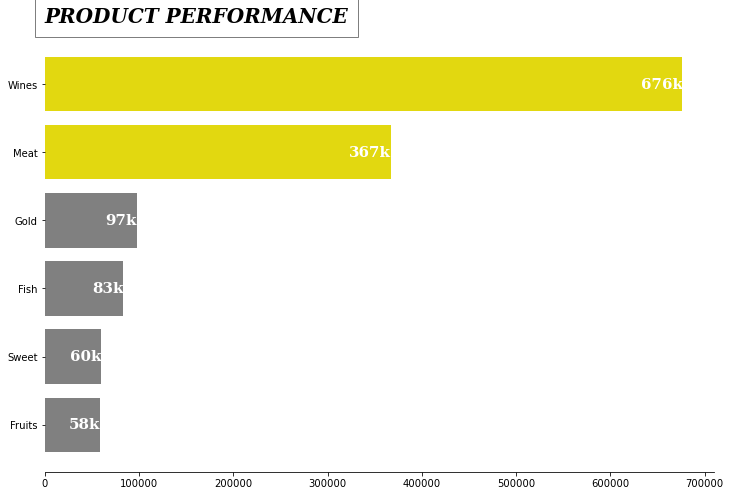

In [9]:
spending_col = [col for col in df2.columns if 'Mnt' in col]

pal_list = ['#e2d810', '#d9138a', '#12a4d9', '#322e2f']

df_products = df2[spending_col].sum().sort_values(ascending = False)
df_products.index = ['Wines', 'Meat', 'Gold', 'Fish', 'Sweet', 'Fruits']

high_perform = '#e2d810'
color_map = ['gray' for i in range(6)]
color_map[0] = color_map[1] =  high_perform

fig, ax = plt.subplots(1, 1, figsize = (12, 8))
ax.barh(df_products.index, df_products, color = 'gray', alpha = 0.5)
ax.barh(df_products.index, df_products, color = color_map)

for i in df_products.index[:2]:
    ax.annotate(f"{int(df_products[i] / 1000)}k", xy = (df_products[i] + 1, i), 
                va = 'center', ha='right', fontsize=15, fontweight='bold', fontfamily='serif',color='white')
for i in df_products.index[2:]:
    ax.annotate(f"{int(df_products[i] / 1000)}k", xy = (df_products[i] + 1, i), 
                va = 'center', ha='right', fontsize=15, fontweight='bold', fontfamily='serif',color='white')
    
for s in ['top', 'right', 'left']:
    ax.spines[s].set_visible(False)
    
ax.text(0, -0.9, 'PRODUCT PERFORMANCE', fontsize = 20, fontfamily = 'serif', fontweight = 'bold', 
        color = 'black', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')
ax.text(0, -0.6, '', fontsize = 15, fontfamily = 'serif', 
        fontweight = 'light', color = '#323232')

ax.invert_yaxis()

plt.show()

Text(-1.6, 1.23, "\nIt's clear here that boomers have a high occupation of wine because of the proportion \nfor generation feature, in addition to high motivated behavior (socialize, pair with food, relaxing, etc.)")

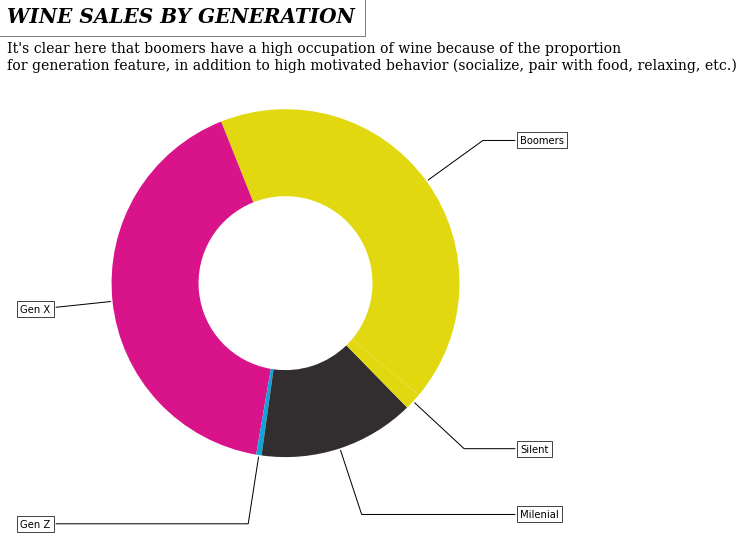

In [15]:
wine_sales = df2.groupby(['Generation'])[['MntWines']].sum().\
reset_index()
wine_sales['percentage'] = wine_sales['MntWines'].apply(lambda x: round(x / np.sum(wine_sales['MntWines']) * 100, 2))


fig, ax = plt.subplots(figsize = (15, 8))

recipe = wine_sales['Generation']

data = wine_sales['MntWines']

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40, colors = pal_list)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
    
ax.text(-1.6, 1.5, "WINE SALES BY GENERATION", fontsize = 20, fontfamily = 'serif', fontweight = 'bold', 
        color = 'black', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')
ax.text(-1.6, 1.23, '''
It's clear here that boomers have a high occupation of wine because of the proportion 
for generation feature, in addition to high motivated behavior (socialize, pair with food, relaxing, etc.)''',
       fontweight = 'light', fontfamily = 'serif', fontsize = 14)

<Figure size 1440x864 with 0 Axes>

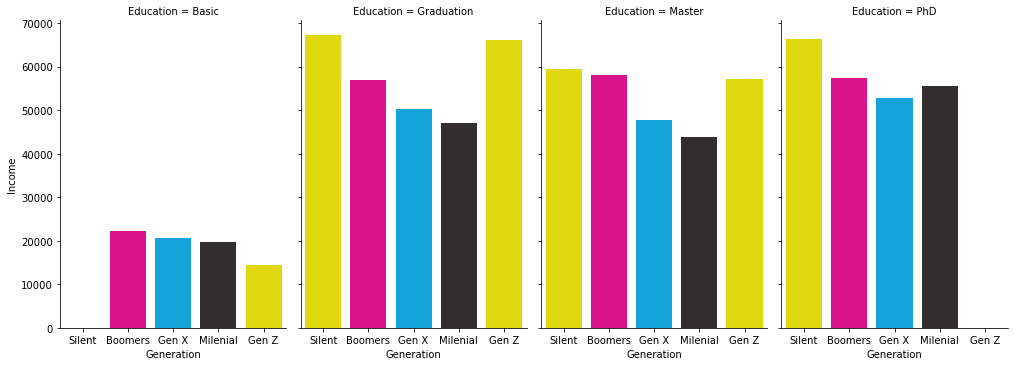

In [16]:
df3 = df2.copy()
outlier= df3[df3['Income'] > 150000].index
df3.drop(outlier, inplace = True)

gen_ed_inc = df3.groupby(['Generation', 'Education'])['Income'].mean().reset_index()

fig = plt.figure(figsize = (20, 12))

sns.catplot(x = 'Generation', y = 'Income', col = 'Education', data = gen_ed_inc, saturation=1, kind="bar", aspect=0.7,
           palette = pal_list, order = ['Silent', 'Boomers', 'Gen X', 'Milenial', 'Gen Z'])

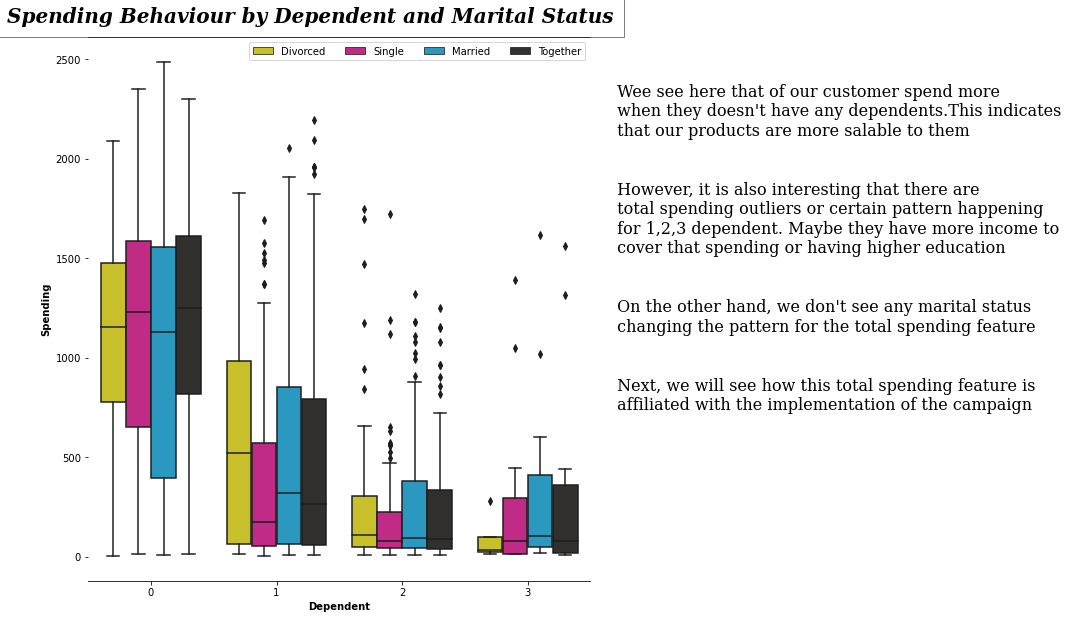

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (9, 10))
sns.boxplot(x = 'Dependent', y = 'Monetary', hue = 'Marital_Status', data = df2, 
            ax = ax, palette = pal_list)

legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Divorced', 'Single', 'Married', 'Together'], ncol = 4, bbox_to_anchor = (1,1))

for s in ['right', 'left']:
    ax.spines[s].set_visible(False)

ax.set_xlabel('Dependent', fontweight = 'bold')
ax.set_ylabel('Spending', fontweight = 'bold', rotation = 90)

fig.text(0, 0.9, "Spending Behaviour by Dependent and Marital Status", fontfamily = 'serif', fontweight = 'bold',
        fontsize = 20, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')
fig.text(0.87, 0.6, '''
         Wee see here that of our customer spend more 
         when they doesn't have any dependents.This indicates
         that our products are more salable to them
         
         
         However, it is also interesting that there are
         total spending outliers or certain pattern happening
         for 1,2,3 dependent. Maybe they have more income to
         cover that spending or having higher education
         
         
         On the other hand, we don't see any marital status 
         changing the pattern for the total spending feature
         
         
         Next, we will see how this total spending feature is 
         affiliated with the implementation of the campaign''',
        fontweight = 'light', fontfamily = 'serif', fontsize = 16, va = 'center', ha = 'left')

plt.show()

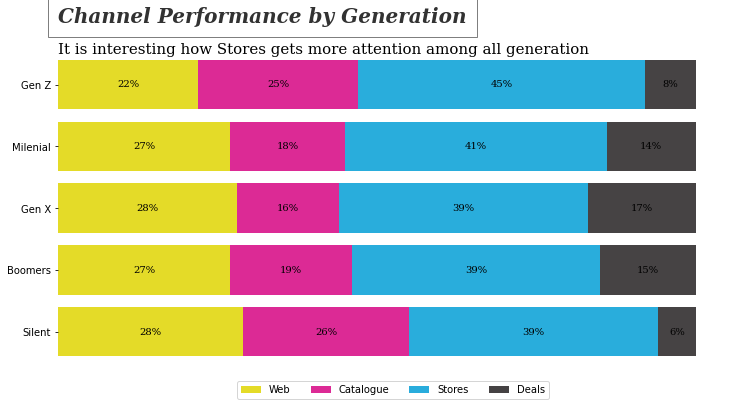

In [12]:
platform_list = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
generation_order = ['Silent', 'Boomers', 'Gen X', 'Milenial', 'Gen Z']

age_platform = df2.groupby('Generation')[platform_list].sum().loc[generation_order]
age_platform['Sum'] = age_platform.sum(axis = 1)
age_platform_ratio = (age_platform.T / age_platform['Sum']).round(2).T
age_platform_ratio.drop('Sum', axis = 1, inplace = True)
age_platform_ratio.rename(columns = {'NumWebPurchases': 'Web',
                                      'NumCatalogPurchases': 'Catalogue', 'NumStorePurchases': 'Stores',
                                    'NumDealsPurchases': 'Deals'}, inplace = True)

fig, ax = plt.subplots(1, 1, figsize = (12, 6))

ax.barh(age_platform_ratio.index, age_platform_ratio['Web'], color = '#e2d810', alpha = 0.9, label = 'Web')
ax.barh(age_platform_ratio.index, age_platform_ratio['Catalogue'], 
        left = age_platform_ratio['Web'], color = '#d9138a', alpha = 0.9, label = 'Catalogue')
ax.barh(age_platform_ratio.index, age_platform_ratio['Stores'], 
        left = age_platform_ratio['Web'] + age_platform_ratio['Catalogue'], 
        color = '#12a4d9', alpha = 0.9, label = 'Stores')
ax.barh(age_platform_ratio.index, age_platform_ratio['Deals'], 
        left = age_platform_ratio['Web'] + age_platform_ratio['Catalogue'] + age_platform_ratio['Stores'], 
        color = '#322e2f', alpha = 0.9, label = 'Deals')


for i in age_platform_ratio.index:
    ax.annotate(f"{int(age_platform_ratio['Web'][i] * 100)}%", xy = (age_platform_ratio['Web'][i] / 2, i), 
                va = 'center', ha='center', fontsize=10, fontweight='light', fontfamily='serif',color='black')
    ax.annotate(f"{int(age_platform_ratio['Catalogue'][i] * 100)}%", 
                xy = (age_platform_ratio['Web'][i] + age_platform_ratio['Catalogue'][i] / 2, i), 
                va = 'center', ha='center', fontsize=10, fontweight='light', fontfamily='serif',color='black')
    ax.annotate(f"{int(age_platform_ratio['Stores'][i] * 100)}%", 
                xy = (age_platform_ratio['Web'][i] + age_platform_ratio['Catalogue'][i] + age_platform_ratio['Stores'][i] / 2, i), 
                va = 'center', ha='center', fontsize=10, fontweight='light', fontfamily='serif',color='black')
    ax.annotate(f"{int(age_platform_ratio['Deals'][i] * 100)}%", 
                xy = (age_platform_ratio['Web'][i] + age_platform_ratio['Catalogue'][i] + age_platform_ratio['Stores'][i] + age_platform_ratio['Deals'][i] / 2, i), 
                va = 'center', ha='center', fontsize=10, fontweight='light', fontfamily='serif',color='black')
    
    
ax.text(0, 5, 'Channel Performance by Generation', fontsize = 20, fontfamily = 'serif', fontweight = 'bold', 
        color = '#323232', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')
ax.text(0, 4.5, 'It is interesting how Stores gets more attention among all generation', fontsize = 15, fontfamily = 'serif', 
        fontweight = 'light')
    
legend_labels, _ = ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Web', 'Catalogue', 'Stores', 'Deals'], ncol = 4, bbox_to_anchor = (0.5, -0.1), loc = 'lower center')
ax.set_xticks([])

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
plt.show()

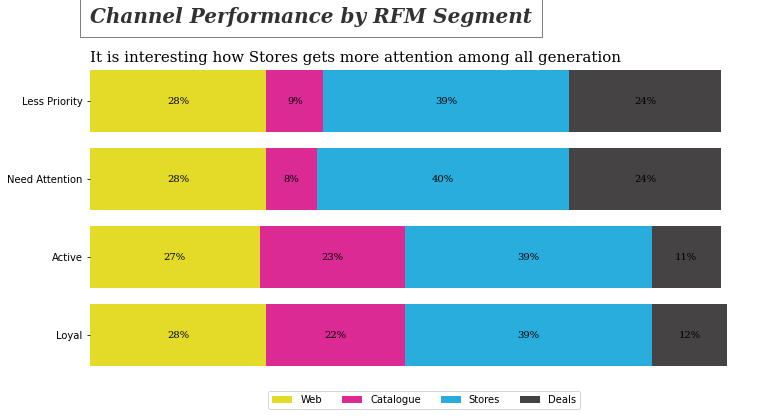

In [13]:
platform_list = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
segment_order = ['Loyal', 'Active', 'Need Attention', 'Less Priority']

age_platform = df2.groupby('Segment')[platform_list].sum().loc[segment_order]
age_platform['Sum'] = age_platform.sum(axis = 1)
age_platform_ratio = (age_platform.T / age_platform['Sum']).round(2).T
age_platform_ratio.drop('Sum', axis = 1, inplace = True)
age_platform_ratio.rename(columns = {'NumWebPurchases': 'Web',
                                      'NumCatalogPurchases': 'Catalogue', 'NumStorePurchases': 'Stores',
                                    'NumDealsPurchases': 'Deals'}, inplace = True)

fig, ax = plt.subplots(1, 1, figsize = (12, 6))

ax.barh(age_platform_ratio.index, age_platform_ratio['Web'], color = '#e2d810', alpha = 0.9, label = 'Web')
ax.barh(age_platform_ratio.index, age_platform_ratio['Catalogue'], 
        left = age_platform_ratio['Web'], color = '#d9138a', alpha = 0.9, label = 'Catalogue')
ax.barh(age_platform_ratio.index, age_platform_ratio['Stores'], 
        left = age_platform_ratio['Web'] + age_platform_ratio['Catalogue'], 
        color = '#12a4d9', alpha = 0.9, label = 'Stores')
ax.barh(age_platform_ratio.index, age_platform_ratio['Deals'], 
        left = age_platform_ratio['Web'] + age_platform_ratio['Catalogue'] + age_platform_ratio['Stores'], 
        color = '#322e2f', alpha = 0.9, label = 'Deals')


for i in age_platform_ratio.index:
    ax.annotate(f"{int(age_platform_ratio['Web'][i] * 100)}%", xy = (age_platform_ratio['Web'][i] / 2, i), 
                va = 'center', ha='center', fontsize=10, fontweight='light', fontfamily='serif',color='black')
    ax.annotate(f"{int(age_platform_ratio['Catalogue'][i] * 100)}%", 
                xy = (age_platform_ratio['Web'][i] + age_platform_ratio['Catalogue'][i] / 2, i), 
                va = 'center', ha='center', fontsize=10, fontweight='light', fontfamily='serif',color='black')
    ax.annotate(f"{int(age_platform_ratio['Stores'][i] * 100)}%", 
                xy = (age_platform_ratio['Web'][i] + age_platform_ratio['Catalogue'][i] + age_platform_ratio['Stores'][i] / 2, i), 
                va = 'center', ha='center', fontsize=10, fontweight='light', fontfamily='serif',color='black')
    ax.annotate(f"{int(age_platform_ratio['Deals'][i] * 100)}%", 
                xy = (age_platform_ratio['Web'][i] + age_platform_ratio['Catalogue'][i] + age_platform_ratio['Stores'][i] + age_platform_ratio['Deals'][i] / 2, i), 
                va = 'center', ha='center', fontsize=10, fontweight='light', fontfamily='serif',color='black')
    
    
ax.text(0, 4, 'Channel Performance by RFM Segment', fontsize = 20, fontfamily = 'serif', fontweight = 'bold', 
        color = '#323232', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')
ax.text(0, 3.5, 'It is interesting how Stores gets more attention among all generation', fontsize = 15, fontfamily = 'serif', 
        fontweight = 'light')
    
legend_labels, _ = ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Web', 'Catalogue', 'Stores', 'Deals'], ncol = 4, bbox_to_anchor = (0.5, -0.1), loc = 'lower center')
ax.set_xticks([])

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
plt.show()

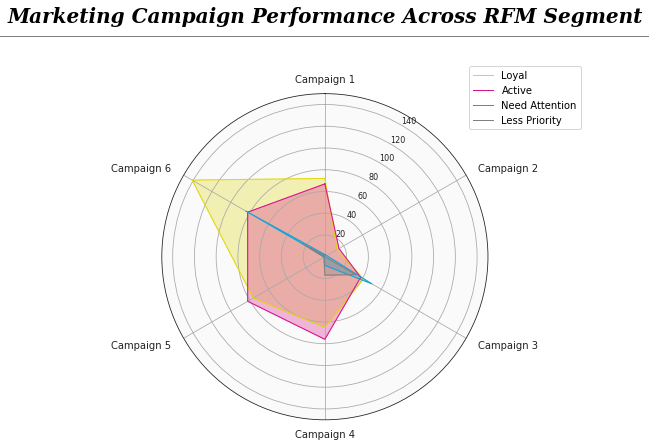

In [14]:
segment_campaign = df2.groupby('Segment')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Response']].sum().loc[segment_order]

labels = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Campaign 6']

# Number of variables we're plotting.
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

def add_to_radar(customer_segment, color):
    values = segment_campaign.loc[customer_segment].tolist()
    values += values[:1]
    ax.plot(angles, values, color = color, linewidth = 1, label = customer_segment)
    ax.fill(angles, values, color = color, alpha = 0.3)

add_to_radar('Loyal', '#e2d810')
add_to_radar('Active', '#d9138a')
add_to_radar('Need Attention', '#12a4d9')
add_to_radar('Less Priority', 'gray')

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], labels)


for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')
        
ax.set_ylim(0, 150)

ax.set_rlabel_position(180 / num_vars)

ax.tick_params(colors='#222222')

ax.tick_params(axis='y', labelsize=8)

ax.grid(color='#AAAAAA')

ax.spines['polar'].set_color('#222222')

ax.set_facecolor('#FAFAFA')

ax.set_title('Marketing Campaign Performance Across RFM Segment', fontdict = {'fontsize': 20, 'fontweight': 'bold',
                'fontfamily': 'serif', 'bbox': {'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, 'style': 'italic'}, y = 1.2)

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))